<font color=black size=6>Análise de possíveis causas de Variação de Pobreza no Brasil</font>







**Sobre o Dataset:**

Levantamento de Pessoas e Famílias no Brasil em situações de Pobreza, Extrema Pobreza, Vulnerabilidade no Brasil usando como fonte dados do Cadastro Único e Auxilio Brasil.

Os dados são uma consolidação anual de diversos datasets, utilizados para amostragem no portal Cidadania de Benecifios Populares compreendidos de 2012 até 2022.

O Cadastro Único se baseia em faixas saláriais para classificar o número de pessoas entre Pobreza e Extrema Pobreza. Foi considerada a renda domiciliar per capita, incluindo os rendimentos de trabalho formal ou informal, além de fontes como seguro-desemprego, aposentadorias e programas de transferência de renda.




**Extrema Pobreza:** Famílias com renda de até  105,00 Reais por pessoa
**Pobreza:** Famílias com renda de 105,01 até 210,00 Reais por pessoa





*Fonte do Critério: Auxilio Brasil*

.

Dicionário de Dados:

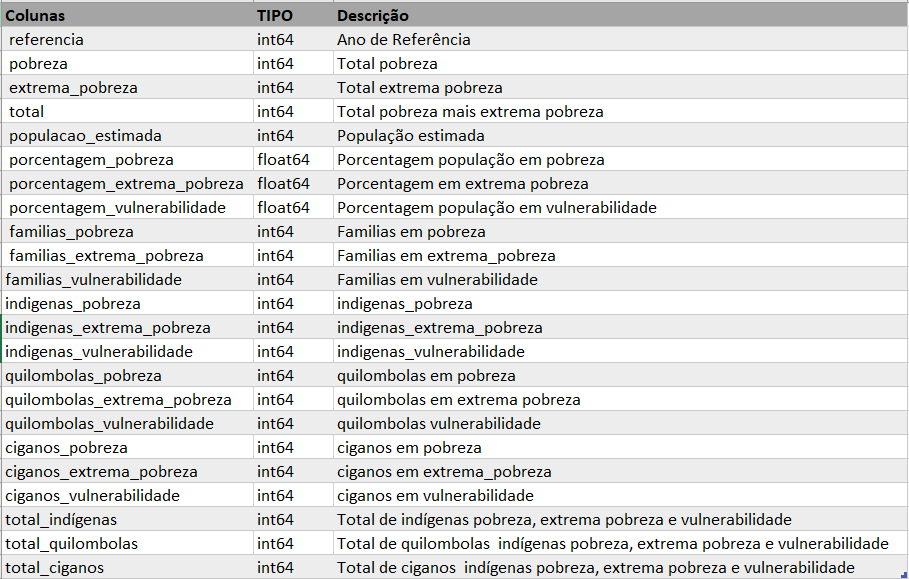





.





LINK https://github.com/BrunoLOliveira90/PUC/raw/main/Dicion%C3%A1rio%20de%20Dados.PNG




In [1]:
#Importação de Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Importando Dataframe**

In [3]:
url = 'https://github.com/BrunoLOliveira90/PUC/raw/main/indices_pobreza_consolidado_anual.csv'
df = pd.read_csv(url, sep=',')
df.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,2012,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
1,2013,201312,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,...,18752056,15781,95602,111383,10718,77092,87810,305,1702,2007
2,2014,201412,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,...,19420635,16711,105747,122458,11986,94670,106656,405,2499,2904
3,2015,201512,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,...,16603991,15970,104672,120642,12770,100889,113659,540,3099,3639
4,2016,201612,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,...,15569480,15723,106059,121782,12370,109495,121865,591,3524,4115


In [4]:
#Analisando Colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   referencia                   11 non-null     int64  
 1   periodo                      11 non-null     int64  
 2   pobreza                      11 non-null     int64  
 3   extrema_pobreza              11 non-null     int64  
 4   total                        11 non-null     int64  
 5   populacao_estimada           11 non-null     int64  
 6   porcentagem_pobreza          11 non-null     float64
 7   porcentagem_extrema_pobreza  11 non-null     float64
 8   porcentagem_vulnerabilidade  11 non-null     float64
 9   familias_pobreza             11 non-null     int64  
 10  familias_extrema_pobreza     11 non-null     int64  
 11  familias_vulnerabilidade     11 non-null     int64  
 12  indigenas_pobreza            11 non-null     int64  
 13  indigenas_extrema_pobr

**Processo de limpeza**

Os Dados vieram praticamente limpos para o que vamos analisar, removi apenas a coluna periodo por não ser relevante.

In [5]:
df.head(10)
df=df.drop(['periodo'], axis =1) #Coluna irrelevante para a análise

df.head()

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,2012,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,13161099,18472436,14209,87820,102029,8314,60250,68564,143,978,1121
1,2013,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,13354834,18752056,15781,95602,111383,10718,77092,87810,305,1702,2007
2,2014,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,14095333,19420635,16711,105747,122458,11986,94670,106656,405,2499,2904
3,2015,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,12335278,16603991,15970,104672,120642,12770,100889,113659,540,3099,3639
4,2016,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,11720302,15569480,15723,106059,121782,12370,109495,121865,591,3524,4115


**Criação de novas colunas com o somatório das populações indigenas, quilombolas,ciganos e vulneráveis**

In [6]:
#DF indígenas
df_indigenas = df[['referencia', 'indigenas_pobreza',	'indigenas_extrema_pobreza',	'indigenas_vulnerabilidade']]
#DF quilombolas
df_quilombolas = df[['referencia', 'quilombolas_pobreza',	'quilombolas_extrema_pobreza',	'quilombolas_vulnerabilidade']]
#DF ciganos
df_ciganos = df[['referencia', 'ciganos_pobreza',	'ciganos_extrema_pobreza',	'ciganos_vulnerabilidade']]
#DF vulneráveis
df_vulneraveis = df[['referencia', 'familias_vulnerabilidade',	'indigenas_vulnerabilidade',	'quilombolas_vulnerabilidade', 'ciganos_vulnerabilidade']]



In [7]:
#criando uma nova coluna com o total de famílias em probreza por grupos
df['total_indígenas'] = df_indigenas.drop(['referencia'], axis=1).agg(sum, axis=1)

df['total_quilombolas'] = df_quilombolas.drop(['referencia'], axis=1).agg(sum, axis=1)

df['total_ciganos'] = df_ciganos.drop(['referencia'], axis=1).agg(sum, axis=1)

<ipython-input-7-7bb027034e4e>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_indígenas'] = df_indigenas.drop(['referencia'], axis=1).agg(sum, axis=1)
<ipython-input-7-7bb027034e4e>:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_quilombolas'] = df_quilombolas.drop(['referencia'], axis=1).agg(sum, axis=1)
<ipython-input-7-7bb027034e4e>:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_ciganos'] = df_ciganos.drop(['r

In [8]:
df.head()

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,...,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,total_indígenas,total_quilombolas,total_ciganos
0,2012,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,13161099,...,102029,8314,60250,68564,143,978,1121,204058,137128,2242
1,2013,19268775,43914616,63183391,201062789,0.10,0.22,0.31,5397222,13354834,...,111383,10718,77092,87810,305,1702,2007,222766,175620,4014
2,2014,18491146,45300249,63791395,202799518,0.09,0.22,0.31,5325302,14095333,...,122458,11986,94670,106656,405,2499,2904,244916,213312,5808
3,2015,14652534,38919660,53572194,204482867,0.07,0.19,0.26,4268713,12335278,...,120642,12770,100889,113659,540,3099,3639,241284,227318,7278
4,2016,12974976,36803455,49778431,206114067,0.06,0.18,0.24,3849178,11720302,...,121782,12370,109495,121865,591,3524,4115,243564,243730,8230


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   referencia                   11 non-null     int64  
 1   pobreza                      11 non-null     int64  
 2   extrema_pobreza              11 non-null     int64  
 3   total                        11 non-null     int64  
 4   populacao_estimada           11 non-null     int64  
 5   porcentagem_pobreza          11 non-null     float64
 6   porcentagem_extrema_pobreza  11 non-null     float64
 7   porcentagem_vulnerabilidade  11 non-null     float64
 8   familias_pobreza             11 non-null     int64  
 9   familias_extrema_pobreza     11 non-null     int64  
 10  familias_vulnerabilidade     11 non-null     int64  
 11  indigenas_pobreza            11 non-null     int64  
 12  indigenas_extrema_pobreza    11 non-null     int64  
 13  indigenas_vulnerabilid

In [10]:
#transformando os dados em percentuais
df['porcentagem_pobreza'] = (df['pobreza'] / df['populacao_estimada']) * 100
df['porcentagem_extrema_pobreza'] = (df['extrema_pobreza'] / df['populacao_estimada']) * 100
df['total_em_pobreza'] = (df['total'] / df['populacao_estimada']) * 100

In [11]:
df.head()

,referencia,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,...,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,total_indígenas,total_quilombolas,total_ciganos,total_em_pobreza
0,2012,19392882,44684759,64077641,193976530,9.997540,23.036168,0.33,5311337,13161099,...,8314,60250,68564,143,978,1121,204058,137128,2242,33.033708
1,2013,19268775,43914616,63183391,201062789,9.583462,21.841245,0.31,5397222,13354834,...,10718,77092,87810,305,1702,2007,222766,175620,4014,31.424706
2,2014,18491146,45300249,63791395,202799518,9.117944,22.337454,0.31,5325302,14095333,...,11986,94670,106656,405,2499,2904,244916,213312,5808,31.455398
3,2015,14652534,38919660,53572194,204482867,7.165654,19.033213,0.26,4268713,12335278,...,12770,100889,113659,540,3099,3639,241284,227318,7278,26.198867
4,2016,12974976,36803455,49778431,206114067,6.295046,17.855868,0.24,3849178,11720302,...,12370,109495,121865,591,3524,4115,243564,243730,8230,24.150914


**Gerando gráficos e análises**

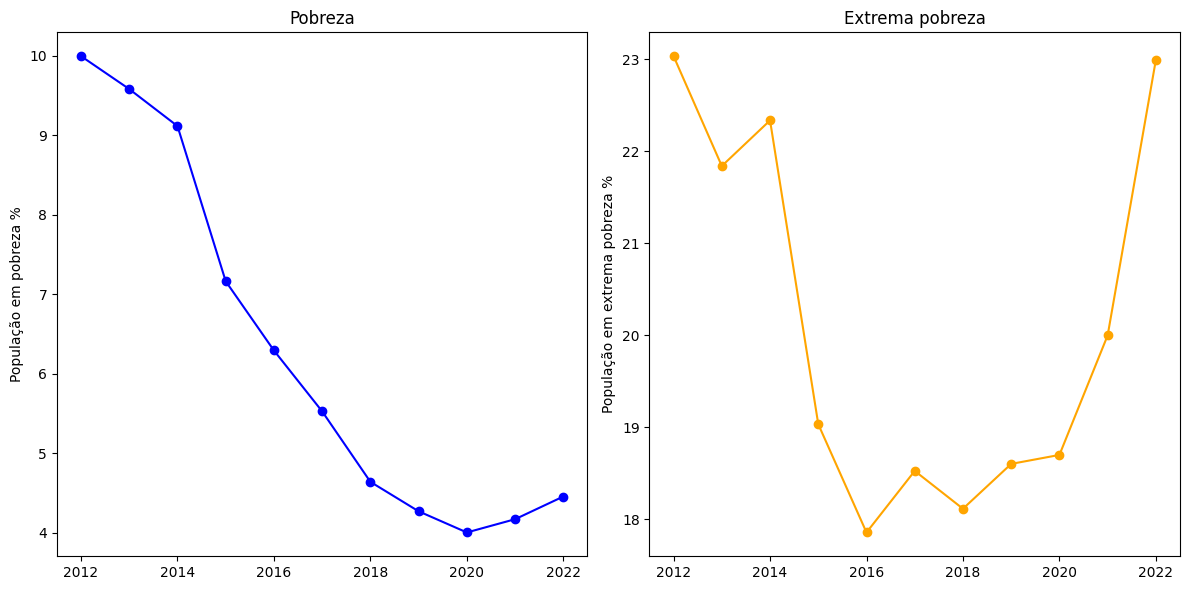

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(df['referencia'], df['porcentagem_pobreza'], marker = 'o', linestyle='solid', color='blue', label = 'Pobreza')
axs[0].set_title('Pobreza')
axs[0].set_ylabel('População em pobreza %')

axs[1].plot(df['referencia'], df['porcentagem_extrema_pobreza'], marker = 'o', linestyle='solid', color='orange', label = 'Extrema pobreza')
axs[1].set_title('Extrema pobreza')
axs[1].set_ylabel('População em extrema pobreza %')


plt.tight_layout()


plt.show()

A primeira consideração que podemos fazer é que a População em Pobreza veio reduzindo de 2012 até 2020, onde alcançou seu pico em 2012. Porém em 2016 notamos que ao mesmo que tempo que a população em Pobreza vem diminuindo, a população em extrema pobreza aumentou.
Isso só é possível se população da linha da pobreza passar para a extrema
pobreza.



Precisaremos analisar de maneira mais detalhada e temos duas datas, momentos importantes a considerar: Crise Politica em 2016 e Pandemia COVID 2020.

**2012 até 2016**

In [13]:
ano12 = df['referencia'][:5]
pobreza12 = df['porcentagem_pobreza'][:5]
extrema_pobreza12 = df['porcentagem_extrema_pobreza'][:5]

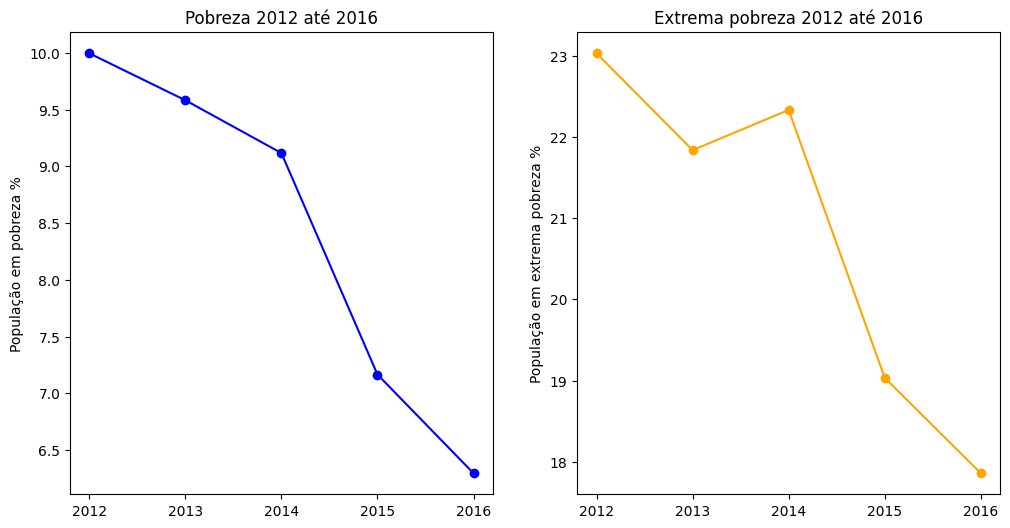

In [14]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
axs[0].plot(ano12, pobreza12, marker = 'o', linestyle = '-', color = 'blue', label = 'Pobreza no ano de 2015 até 2015')
axs[0].set_title('Pobreza 2012 até 2016');
axs[0].set_ylabel('População em pobreza %')
axs[0].set_xticks(ano12);

axs[1].plot(ano12, extrema_pobreza12, marker = 'o', linestyle = '-', color = 'orange')
axs[1].set_title('Extrema pobreza 2012 até 2016');
axs[1].set_xticks(ano12);
axs[1].set_ylabel('População em extrema pobreza %');

Podemos verificar nesta analise que os dados acompanham as quedas, seguem o mesmo padrão de queda continua após 2014, diferente dos anos de 2017 pra frente.

**2017 até 2022**



In [15]:
pobreza16 = df['porcentagem_pobreza'][5:]
ano16 = df['referencia'][5:]
extrema_pobreza16 = df['porcentagem_extrema_pobreza'][5:]

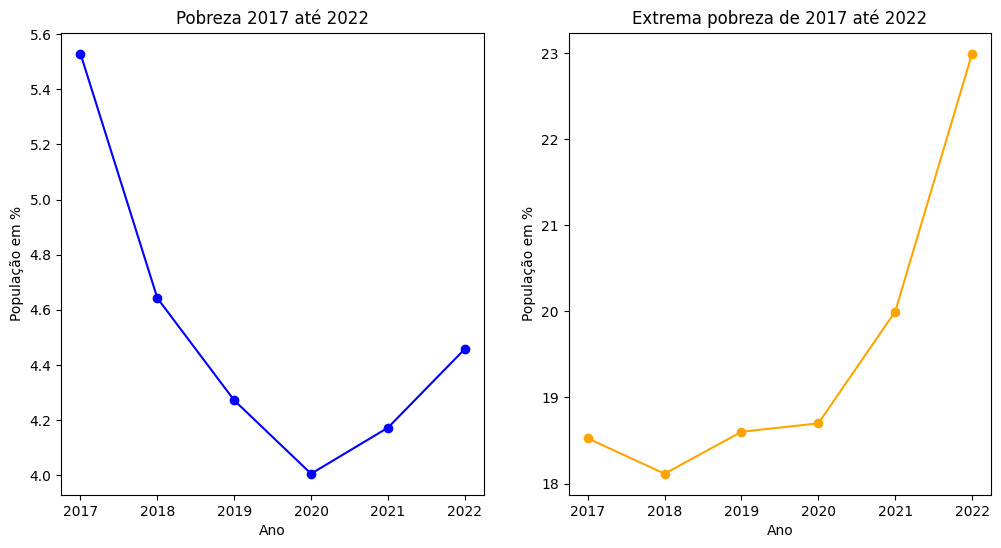

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))
axs[0].plot(ano16, pobreza16, marker = 'o', linestyle= '-', color = 'blue')
axs[0].set_title('Pobreza 2017 até 2022');
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('População em %')

axs[1].plot(ano16, extrema_pobreza16, marker='o', linestyle='-', color = 'orange')
axs[1].set_title('Extrema pobreza de 2017 até 2022');
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('População em %');

**Analise mais criterioza referentes as duas datas chaves, pós 2016 e 2020.**

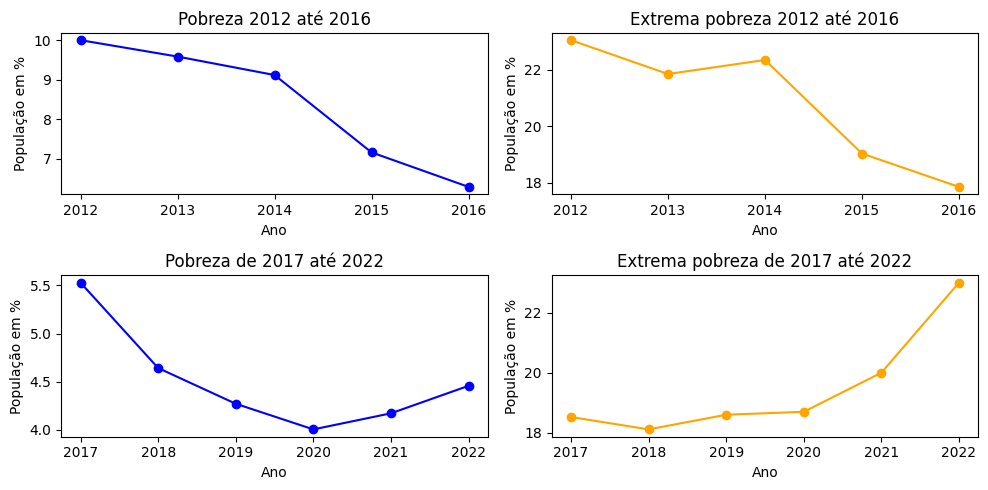

In [17]:
#RESUMO das informações
fig, axs = plt.subplots(2, 2, figsize = (10, 5))
axs[0, 0].plot(ano12, pobreza12, marker = 'o', linestyle = '-', color = 'blue', label = 'Pobreza no ano de 2015 até 2015')
axs[0, 0].set_title('Pobreza 2012 até 2016')
axs[0, 0].set_xticks(ano12)
axs[0,0].set_xlabel('Ano')
axs[0,0].set_ylabel('População em %')

axs[0, 1].plot(ano12, extrema_pobreza12, marker = 'o', linestyle = '-', color = 'orange')
axs[0, 1].set_title('Extrema pobreza 2012 até 2016')
axs[0, 1].set_xticks(ano12)
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('População em %')

axs[1, 0].plot(ano16, pobreza16, marker = 'o', linestyle= '-', color = 'blue')
axs[1, 0 ].set_title('Pobreza de 2017 até 2022')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('População em %')

axs[1, 1].plot(ano16, extrema_pobreza16, marker='o', linestyle='-', color = 'orange')
axs[1, 1].set_title('Extrema pobreza de 2017 até 2022')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('População em %')

plt.tight_layout()

**Análise do total da população em pobreza e extrema pobreza e conclusões finais**

In [18]:
total_pobreza12 = df['total_em_pobreza'][:5]
total_pobreza16 = df['total_em_pobreza'][5:]

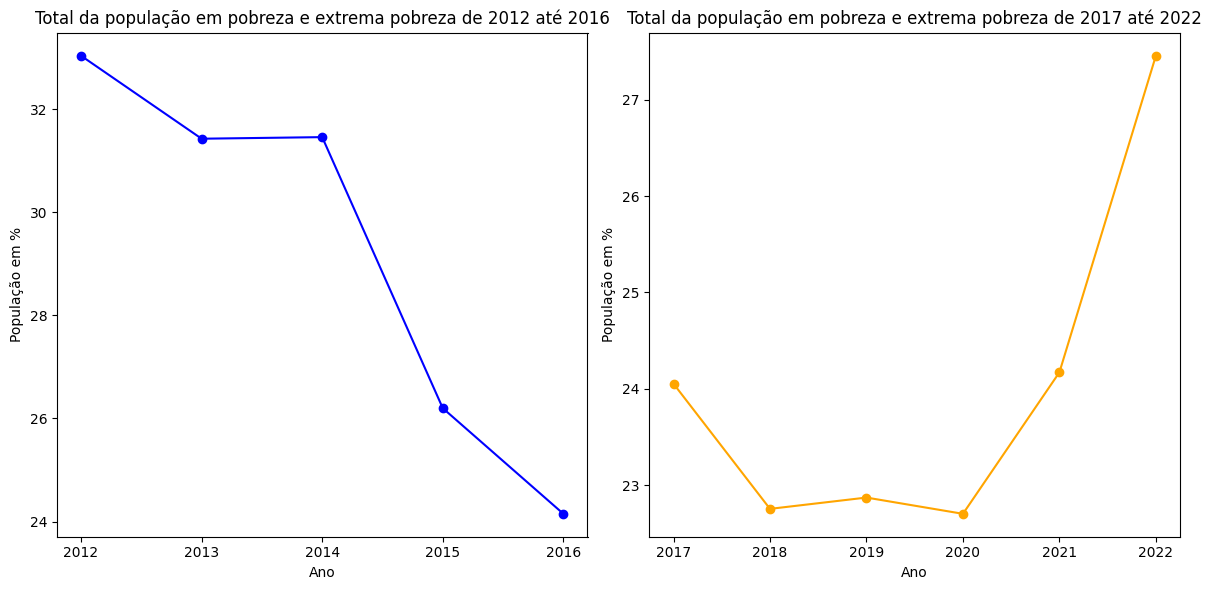

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].plot(ano12, total_pobreza12, marker = 'o', linestyle = '-', color = 'blue')
axs[0].set_xticks(ano12);
axs[0].set_title('Total da população em pobreza e extrema pobreza de 2012 até 2016')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('População em %')

axs[1].plot(ano16, total_pobreza16, marker = 'o', linestyle = '-', color = 'orange')
axs[1].set_xticks(ano16);
axs[1].set_title('Total da população em pobreza e extrema pobreza de 2017 até 2022')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('População em %')

plt.tight_layout()

De maneira geral, a análise dos dados nos mostra uma acentuada subida nos níveis de população em situação de pobreza e extrema pobreza nos anos pós-crise política de 2016. Crises políticas, de um modo geral, tendem a acentuar índices econômicos e sociais desfavoráveis. Analisar de forma mais crítica é necessário, principalmente considerando o contexto político em que o Brasil estava inserido em ambos os gráficos. Para nosso estudo, não entrarei em mais detalhes sobre a crise sendo que com as informações resumidas a analise em questão me atendeu ao que esperava.

 Gráfico a apartir de 2020, onde tivemos as paralisações e o periodo emergencial da pandemia da COVID, fica evidenciado um forte aumento em ambas as populações, sendo mais evidenciado da população de Extrema Pobreza.
 Isso possivelmente se da a grandes concentrações de recursos na pequena parcela dos mais ricos, perda de empregos formais e informais, paralisação do comércio, demora na criação de programas de distribuição de auxilios emergencias e afins e o baixo acesso à tecnologia e ao capital humano limitando a capacidade de adaptação ao ambiente de trabalho, entre outros. Os diversos possiveis motivos serão fruto de outra análise sendo suficiente compreender pela analise atual, que o choque causado pela pandemia reverteu uma tendência de queda no indicador de pobreza e pobreza extrema na população Brasileira.


